### Kamorudeen Yusuf Olalekan <br> 

# Car consumption prediction project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn import cluster
from sklearn.cluster import KMeans 
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.naive_bayes import GaussianNB
import pickle
from sklearn.feature_extraction import DictVectorizer

#### here we read the data using the pandas library

In [2]:
df = pd.read_csv('mpgTrainingSet-headings.csv')

In [3]:
#to view the data 
df

,Consumption,Cylinders,cubic_inch,horsepower,weight,acceleration,brand,car_name
0,35,4,79.0,58.0,1825,18.6,renault,5
1,25,4,96.0,69.0,2189,18.0,renault,12
2,25,4,98.0,90.0,2265,15.5,fiat,124_sport
3,25,4,116.0,75.0,2246,14.0,fiat,124
4,30,4,68.0,49.0,1867,19.5,fiat,128_sport
...,...,...,...,...,...,...,...,...
337,30,4,79.0,67.0,2000,16.0,fiat,x1.9
338,20,6,200.0,85.0,3070,16.7,mercury,zephyr
339,20,6,200.0,85.0,2990,18.2,mercury,zephyr
340,25,4,108.0,93.0,2391,15.5,subaru,NaN


In [4]:
#to view the columns
df.columns

Index(['Consumption', 'Cylinders', 'cubic_inch', 'horsepower', 'weight',
       'acceleration', 'brand', 'car_name'],
      dtype='object')

In [5]:
#to check the statistics on each consumption category,
df.groupby('Consumption').describe()

Cylinders                                              cubic_inch  \
                count      mean       std  min  25%  50%  75%  max      count   
Consumption                                                                     
10                8.0  8.000000  0.000000  8.0  8.0  8.0  8.0  8.0        8.0   
15               73.0  7.671233  0.746376  6.0  8.0  8.0  8.0  8.0       73.0   
20               85.0  5.788235  1.380943  3.0  4.0  6.0  6.0  8.0       85.0   
25               64.0  4.437500  1.052209  3.0  4.0  4.0  4.0  8.0       64.0   
30               58.0  4.068966  0.368118  4.0  4.0  4.0  4.0  6.0       58.0   
35               37.0  4.081081  0.363500  4.0  4.0  4.0  4.0  6.0       37.0   
40               11.0  4.181818  0.603023  4.0  4.0  4.0  4.0  6.0       11.0   
45                6.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0        6.0   

                         ...   weight         acceleration             \
                   mean  ...      75%     max        count       mean   
Consumption              ...                                            
10           395.375000  ...  4951.25  4997.0          8.0  12.125000   
15           325.287671  ...  4341.00  4735.0         73.0  13.742466   
20           207.717647  ...  3459.00  4215.0         85.0  15.876471   
25           140.828125  ...  2857.50  3900.0         64.0  16.365625   
30           107.224138  ...  2555.50  3250.0         58.0  16.513793   
35           103.351351  ...  2215.00  2950.0         37.0  15.872973   
40           105.454545  ...  2117.50  3015.0         11.0  16.800000   
45            90.666667  ...  2125.00  2335.0          6.0  20.533333   

                                                         
                  std   min     25%   50%     75%   max  
Consumption                                              
10           1.187735  11.0  11.000  12.0  12.750  14.0  
15           2.650625   8.5  12.000  13.5  14.900  21.0  
20           2.183523  11.0  14.500  15.9  17.200  21.9  
25           2.384821  12.5  14.900  16.0  17.600  24.8  
30           2.430901  11.3  14.825  16.4  18.175  22.2  
35           1.935437  11.4  14.500  15.8  17.300  19.9  
40           1.608726  14.7  15.600  16.9  17.950  19.2  
45           4.028234  13.8  18.800  21.6  23.200  24.6  

[8 rows x 40 columns]

##### here we see that we have 8 categories of fuel consumption, which includes 10, 15, 20, 25, 30, 35, 40 and 45

# Exploratory Data Analysis

Text(0.5, 1.0, 'Horsepower vs Consumption')

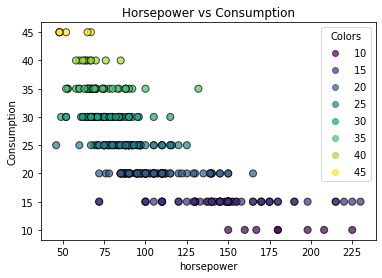

In [6]:
fig1, ax1 = plt.subplots()
scat = ax1.scatter(x = df["horsepower"],y = df["Consumption"], linewidths=1, alpha = .7, edgecolor= 'k', s=50, c =df["Consumption"])
ax1.legend(*scat.legend_elements(), title="Colors")
plt.xlabel("horsepower")
plt.ylabel("Consumption")
plt.title("Horsepower vs Consumption")

Text(0.5, 1.0, 'Horsepower vs cubic_inch')

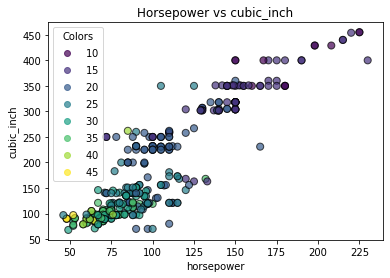

In [7]:
fig1, ax1 = plt.subplots()
scat = ax1.scatter(x = df["horsepower"],y = df['cubic_inch'], linewidths=1, alpha = .7, edgecolor= 'k', s=50, c =df["Consumption"])
ax1.legend(*scat.legend_elements(), title="Colors")
plt.xlabel("horsepower")
plt.ylabel('cubic_inch')
plt.title("Horsepower vs cubic_inch")

In [8]:
#only car_name has missing values, since it isnt too relivant to our analysis, we will drop the carname column
df.isnull().sum()

Consumption     0
Cylinders       0
cubic_inch      0
horsepower      0
weight          0
acceleration    0
brand           0
car_name        2
dtype: int64

### only car_name has 2 missing values, since the car name isn't relevant in our analysis, we ignore it

In [9]:
#getting the features that have numerical values
continuous_feature = [features for features in df.columns if df[features].dtypes != 'O']

In [10]:
continuous_feature

['Consumption',
 'Cylinders',
 'cubic_inch',
 'horsepower',
 'weight',
 'acceleration']

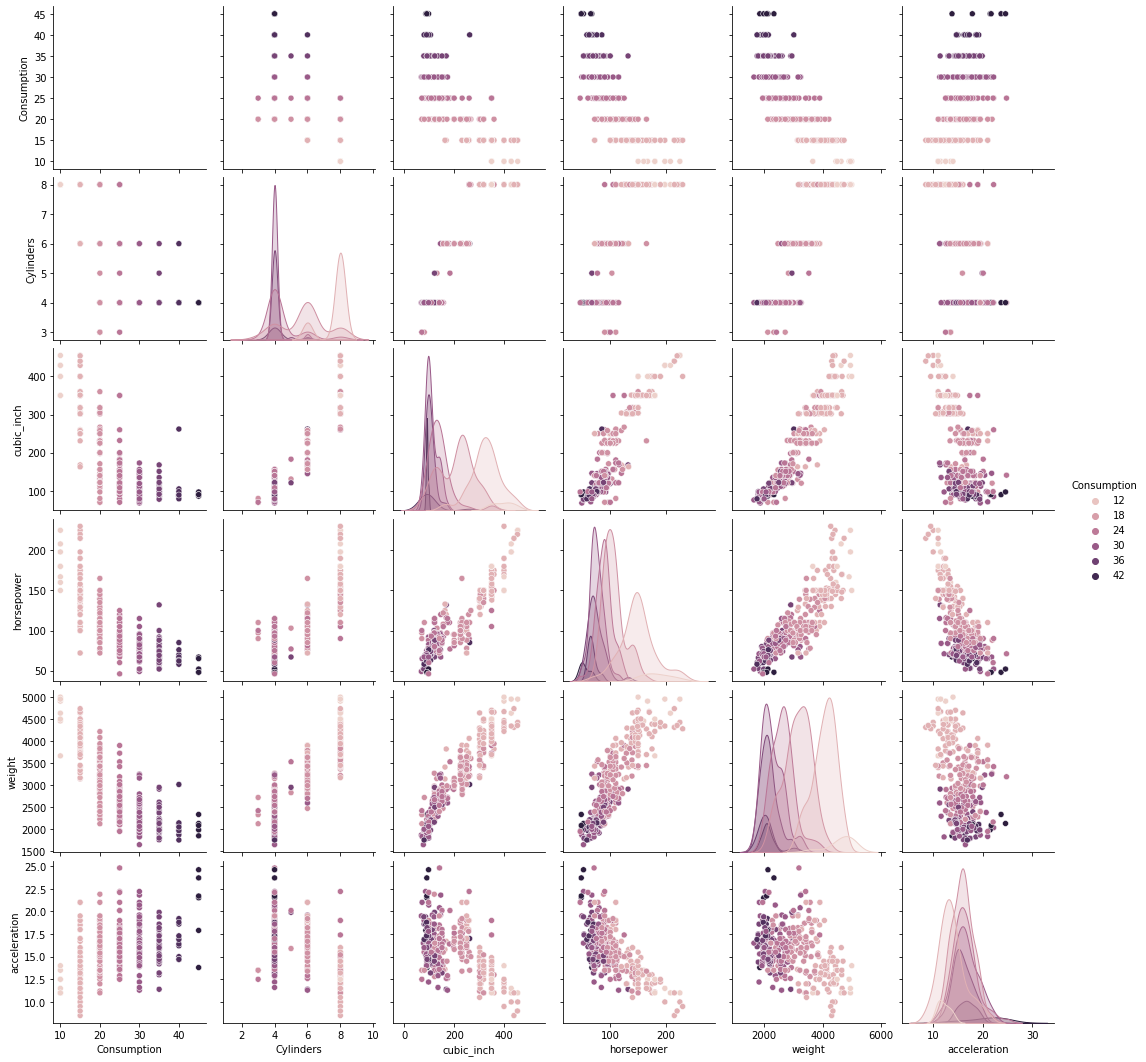

In [11]:
#the pair plot of all columns in dataframe.

sns.pairplot(data = df, vars=['Consumption','Cylinders', 'cubic_inch', 'horsepower',
                                'weight','acceleration'], hue= 'Consumption', diag_kind="auto")
plt.show()

#### From the above chart we can see that almost all the features do not follow a normal distribution and are skewed 

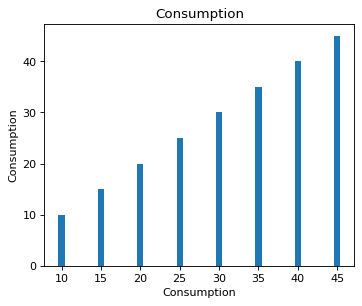

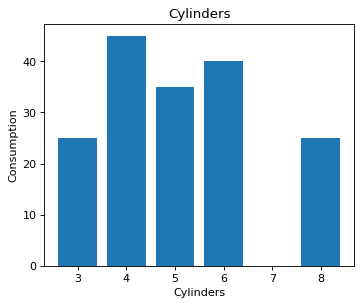

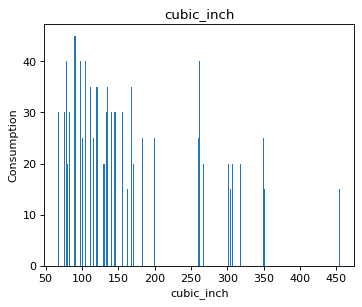

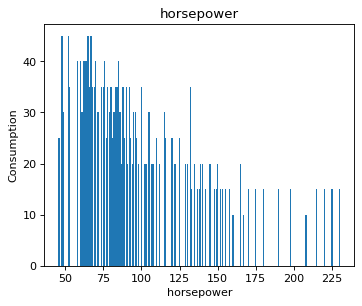

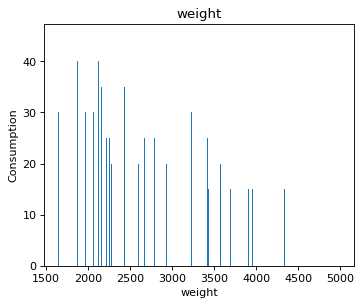

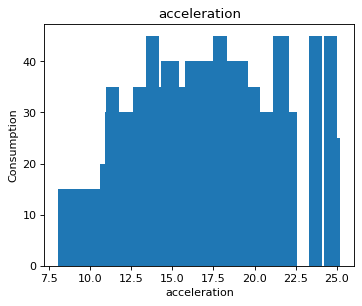

In [12]:
#bar plots showing the relationships of different columns with the target column which is consumption

for feature in continuous_feature:
    data=df.copy()
    figure(figsize=(5, 4), dpi=80)
    plt.bar(data[feature],data['Consumption'])
    plt.xlabel(feature)
    plt.ylabel('Consumption')
    plt.title(feature)
    plt.show()

## Initial observations and assumptions from chart

###### 1)  The available types of car cylinders are 3,4,5,6,8 and cars with 4 cylinders have the highest consumption rate <br> 2) cars with larger cubic_inch  &  horsepower have low consumption but cars while smaller cubic_inch & horsepower have higher consumption <br> 3) cars with higher weight have low consumption rate and cars with lower weight have higher consumption  <br> 4) cars with low acceleration have lower consuption rate

Text(0.5, 1.0, 'Heatmap to view the correlation between each of the features ')

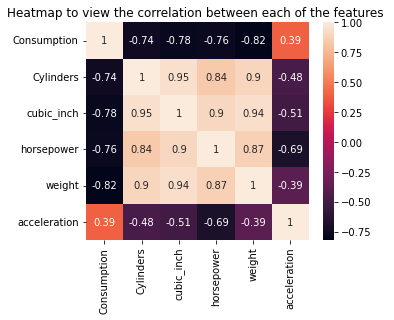

In [13]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap to view the correlation between each of the features ")

#### we can see from the correlation that as Cylinders,cubic_inch, horsepower, weight are inversely correlated with fuel consumption

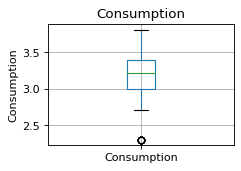

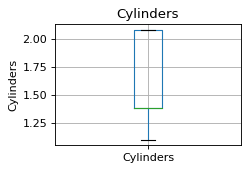

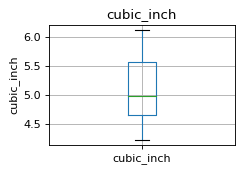

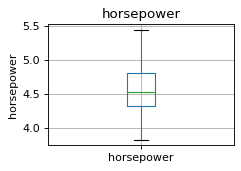

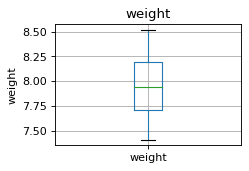

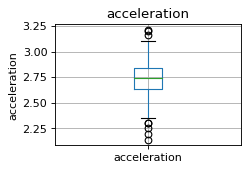

In [14]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        figure(figsize=(3, 2), dpi=80)
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

#### There exists some outliers in the acceleration and very few in the consumption

# Feature engineering 

#### we write a function to scale down the features 

In [15]:
#function that scales down the values 

def scalled(df):
    feature_scale=[feature for feature in df.columns if feature not in ['Consumption','brand', 'car_name']]
    scaler= MinMaxScaler()
    scaler.fit(df[feature_scale])
    scaler.transform(df[feature_scale])
    # transform the train and test set, and add on the Id and SalePrice variables
    data = pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)
    return data 


In [16]:
data = scalled(df)

data.head()

,Cylinders,cubic_inch,horsepower,weight,acceleration
0,0.2,0.028424,0.065217,0.052569,0.619632
1,0.2,0.072351,0.125000,0.161290,0.582822
2,0.2,0.077519,0.239130,0.183990,0.429448
3,0.2,0.124031,0.157609,0.178315,0.337423
4,0.2,0.000000,0.016304,0.065114,0.674847


### Principal component analysis

to determine the lost information.


In [17]:
for i in range(1,6):
    
    pca = PCA(n_components=i)
    pca.fit(data)
    print (i, 'components represent data loss of' ,(1-sum(pca.explained_variance_ratio_)) * 100,'%')


1 components represent data loss of 12.25363181725081 %
2 components represent data loss of 4.714797246367786 %
3 components represent data loss of 1.5252428456467793 %
4 components represent data loss of 0.7333650470021991 %
5 components represent data loss of 0.0 %


In [18]:
n_components=2
pca = PCA(n_components)
pcad = pca.fit_transform(data)
#verify if pca dimension is correct 
print(data.shape,pcad.shape)

(342, 5) (342, 2)


In [19]:
#to view th principal components 
df_comp = pd.DataFrame(pca.components_,columns=data.columns,index = ['PCA0','PCA1'])
print(df_comp)

      Cylinders  cubic_inch  horsepower    weight  acceleration
PCA0   0.630701    0.496700    0.351343  0.449673     -0.172791
PCA1   0.205419    0.067296   -0.346144  0.245849      0.879214


Text(0.5, 1.0, 'Scatter plot of the principal components')

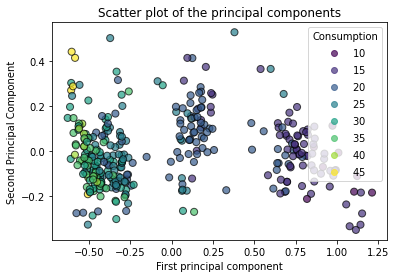

In [20]:
fig1, ax1 = plt.subplots()
scat = ax1.scatter(x = pcad[:,0],y = pcad[:,1], linewidths=1, alpha = .7, edgecolor= 'k', s=50, c =df["Consumption"])
ax1.legend(*scat.legend_elements(), title="Consumption")
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.title("Scatter plot of the principal components")

# Model building 

#### function that helps us split the data and exclude the columns we dont want

In [21]:
#this function separates the features from the target, we excleded cubic_inch because it increased out accuracy
def loading(df):
    feature_scale=[feature for feature in df.columns if feature not in ['Consumption','brand', 'car_name','cubic_inch']]
    return df[feature_scale] , df['Consumption']


In [22]:
#we load the test data 
df_test = pd.read_csv('mpgTestSet-headings.csv')

In [23]:
#we use the loading function written earlier to separate the features from the target 
X_train, y_train = loading(df) 
X_test, y_test = loading(df_test)

#### we use the minmax scaller function to normalize the train data using fit_transform() function <br> then we use same normalization parameters to transform the test data using the transform() function

In [24]:
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
sc = scaler

In [25]:
#we take a brief look at the training features after scaling them down
feature_scale=[feature for feature in df.columns if feature not in ['Consumption','brand', 'car_name','cubic_inch']]
pd.DataFrame(X_train, columns=feature_scale).head(5)

,Cylinders,horsepower,weight,acceleration
0,0.2,0.065217,0.052569,0.619632
1,0.2,0.125000,0.161290,0.582822
2,0.2,0.239130,0.183990,0.429448
3,0.2,0.157609,0.178315,0.337423
4,0.2,0.016304,0.065114,0.674847


In [26]:
#we take a brief look at the test features after scaling them down
pd.DataFrame(X_test, columns=feature_scale).head(9)

,Cylinders,horsepower,weight,acceleration
0,1.0,0.782609,0.657407,0.000000
1,1.0,0.673913,0.571685,0.092025
2,1.0,0.619565,0.585424,-0.030675
3,1.0,0.565217,0.630824,0.061350
4,1.0,0.972826,0.429211,0.092025
5,0.2,0.266304,0.215950,0.398773
6,0.6,0.266304,0.353644,0.429448
7,0.6,0.277174,0.336022,0.429448
8,0.6,0.211957,0.280167,0.460123


In [27]:
#this function calculates the accuracy of the train and test dataset 
#it also shows the classification report, plots the confusion matrix in a heatmap and plots 
#the test set vs the predicted values on the same scatter plot 

def scoring(model,X_train,y_train, X_test, y_test,y_pred, class_names):
    #model(y_pred, y_test)
    train_score = model.score(X_train, y_train)

    print(f'Train score of trained model: {train_score*100}')
    test_score = model.score(X_test, y_test)
    
    print(f'Test score of trained model: {test_score*100}')
    conf_matrix = confusion_matrix(y_test,y_pred)
    #conf_matrix = confusion_matrix(y_pred, y_train)
    
    df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize = (5,3))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    plt.title('Confusion matrix')
    
    fig = plt.figure(figsize = (5,3))
    sns.scatterplot(data=y_test)
    sns.scatterplot(data=y_pred)

    plt.legend(loc='upper left', labels=['test', 'pred'])
    plt.title('Test values vs predicted Test data') 
    plt.xlabel('Index')
    
    #WE TRY TO PREDICT THE THIRD VALUE
    print(f'MODEL CHECK: Sixth value of test set is {y_test[6]}, predicted value is {y_pred[6]}')
    
    print(classification_report(y_test,y_pred))


# Classification

## Gaussian Naive Bayes

In [28]:
GNB = GaussianNB()
GNB.fit(X_train,y_train,sample_weight=100) 
gy_pred=GNB.predict(X_test) #prediction

Train score of trained model: 30.116959064327485
Test score of trained model: 28.000000000000004
MODEL CHECK: Sixth value of test set is 20, predicted value is 20
              precision    recall  f1-score   support

          10       0.27      0.80      0.40         5
          15       0.00      0.00      0.00        13
          20       0.80      0.73      0.76        11
          25       0.33      0.07      0.11        15
          30       0.17      0.20      0.18         5
          35       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         0

    accuracy                           0.28        50
   macro avg       0.22      0.26      0.21        50
weighted avg       0.32      0.28      0.26        50



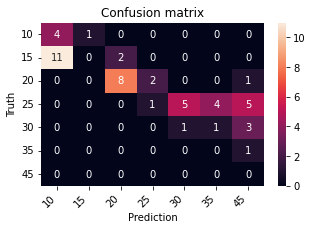

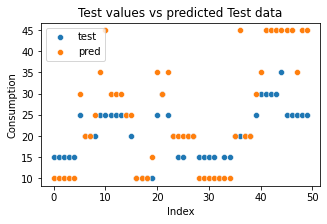

In [29]:
class_names = ["10", "15", "20", "25", "30", "35","45"]
scoring(GNB,X_train,y_train, X_test, y_test,gy_pred,class_names)

## Decision Trees

In [30]:
dtc = DecisionTreeClassifier(max_leaf_nodes=10,max_depth=4)
dtc.fit(X_train, y_train)
dy_pred = dtc.predict(X_test)

Train score of trained model: 61.40350877192983
Test score of trained model: 62.0
MODEL CHECK: Sixth value of test set is 20, predicted value is 20
              precision    recall  f1-score   support

          10       0.50      0.20      0.29         5
          15       0.71      0.77      0.74        13
          20       0.73      0.73      0.73        11
          25       0.67      0.53      0.59        15
          30       0.36      0.80      0.50         5
          35       0.00      0.00      0.00         1

    accuracy                           0.62        50
   macro avg       0.50      0.50      0.47        50
weighted avg       0.63      0.62      0.61        50



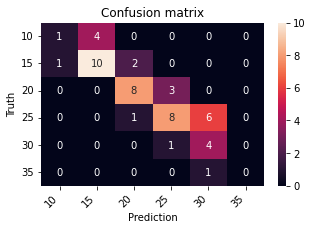

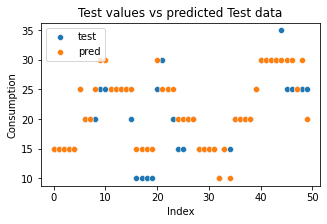

In [31]:
class_names = ["10", "15", "20", "25", "30", "35"]
scoring(dtc,X_train,y_train, X_test, y_test,dy_pred,class_names )

## Support vector machines 

In [32]:
svc = SVC(gamma='auto',)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

Train score of trained model: 53.50877192982456
Test score of trained model: 68.0
MODEL CHECK: Sixth value of test set is 20, predicted value is 20
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         5
          15       0.69      0.85      0.76        13
          20       0.83      0.91      0.87        11
          25       0.77      0.67      0.71        15
          30       0.33      0.60      0.43         5
          35       0.00      0.00      0.00         1

    accuracy                           0.68        50
   macro avg       0.44      0.50      0.46        50
weighted avg       0.63      0.68      0.65        50



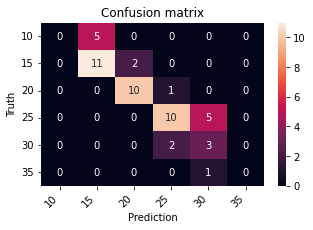

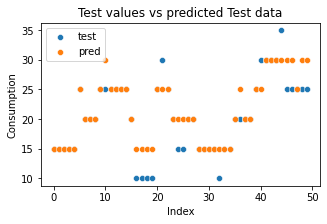

In [33]:
class_names = ["10", "15", "20", "25", "30", "35"]
scoring(svc,X_train,y_train, X_test, y_test,y_pred,class_names)

# Random forest 

In [34]:
rmf = RandomForestClassifier(max_depth=3, random_state=1)

rmf.fit(X_train, y_train)
sy_pred = rmf.predict(X_test)

Train score of trained model: 59.06432748538012
Test score of trained model: 68.0
MODEL CHECK: Sixth value of test set is 20, predicted value is 20
              precision    recall  f1-score   support

          10       0.50      0.20      0.29         5
          15       0.71      0.77      0.74        13
          20       0.83      0.91      0.87        11
          25       0.83      0.67      0.74        15
          30       0.30      0.60      0.40         5
          35       0.00      0.00      0.00         1

    accuracy                           0.68        50
   macro avg       0.53      0.52      0.51        50
weighted avg       0.70      0.68      0.67        50



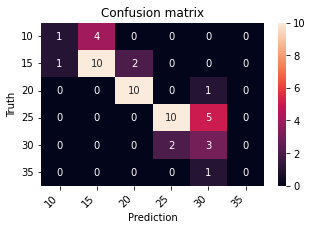

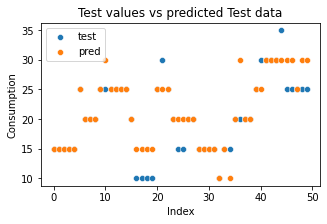

In [35]:
class_names = ["10", "15", "20", "25", "30", "35"]
scoring(rmf,X_train,y_train, X_test, y_test,sy_pred,class_names )

# Gradient boosting 

In [36]:
GRB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,max_depth=3, random_state=1)
GRB.fit(X_train, y_train)
gry_pred = GRB.predict(X_test)

Train score of trained model: 69.5906432748538
Test score of trained model: 54.0
MODEL CHECK: Sixth value of test set is 20, predicted value is 20
              precision    recall  f1-score   support

          10       0.50      0.20      0.29         5
          15       0.67      0.62      0.64        13
          20       0.50      0.64      0.56        11
          25       0.69      0.60      0.64        15
          30       0.29      0.40      0.33         5
          35       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         0

    accuracy                           0.54        50
   macro avg       0.38      0.35      0.35        50
weighted avg       0.57      0.54      0.54        50



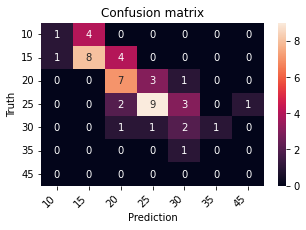

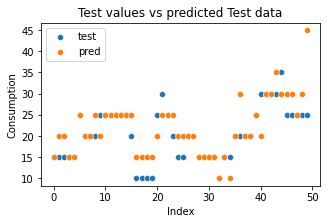

In [37]:
class_names = ["10", "15", "20", "25", "30", "35","45"]
scoring(GRB,X_train,y_train, X_test, y_test,gry_pred,class_names)

# Linear Discriminant Analysis.

In [38]:
LDR = LinearDiscriminantAnalysis()
LDR.fit(X_train, y_train)
ldy_pred = LDR.predict(X_test)

Train score of trained model: 53.216374269005854
Test score of trained model: 72.0
MODEL CHECK: Sixth value of test set is 20, predicted value is 20
              precision    recall  f1-score   support

          10       0.83      1.00      0.91         5
          15       1.00      0.77      0.87        13
          20       0.83      0.91      0.87        11
          25       0.86      0.40      0.55        15
          30       0.42      1.00      0.59         5
          35       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         0

    accuracy                           0.72        50
   macro avg       0.56      0.58      0.54        50
weighted avg       0.83      0.72      0.73        50



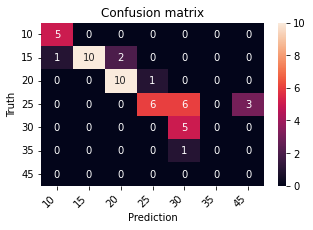

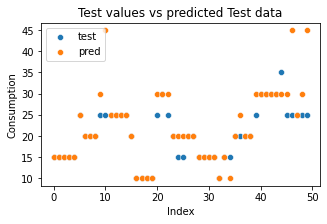

In [39]:
class_names = ["10", "15", "20", "25", "30", "35","45"]
scoring(LDR,X_train,y_train, X_test, y_test,ldy_pred,class_names)

# Analysis of results from models 

#### checking and ranking accuracy of all model

In [40]:
train_model = []
test_model = []
def accuracy(X_train, y_train,X_test,y_test):

    algos = {"Gaussian Naive Bayes" : GNB, "Decision Trees" : dtc, "Support vector machines": svc, "Random forest" :rmf ,"Gradient boosting" : GRB,"Linear Discriminant Analysis" : LDR}
    
    for i in algos:
        y_pred = algos[i].predict(X_test)
        train_score = algos[i].score(X_train, y_train)
        test_score = algos[i].score(X_test, y_test)
        print(f' {i} -> score on trained model: {train_score*100}% and score on Test model : {test_score*100}%' )
        train_model.append(train_score*100)
        test_model.append(test_score*100)

In [41]:
accuracy(X_train, y_train,X_test,y_test)

 Gaussian Naive Bayes -> score on trained model: 30.116959064327485% and score on Test model : 28.000000000000004%
 Decision Trees -> score on trained model: 61.40350877192983% and score on Test model : 62.0%
 Support vector machines -> score on trained model: 53.50877192982456% and score on Test model : 68.0%
 Random forest -> score on trained model: 59.06432748538012% and score on Test model : 68.0%
 Gradient boosting -> score on trained model: 69.5906432748538% and score on Test model : 54.0%
 Linear Discriminant Analysis -> score on trained model: 53.216374269005854% and score on Test model : 72.0%


In [42]:
# creating DataFrame
labels = ["Gaussian Naive Bayes","Decision Trees","Support vector machines","Random forest","Gradient boosting","Linear Discriminant Analysis"]
model_accuracy = pd.DataFrame( [train_model,test_model], columns= [labels], index = ['train','test'])

In [43]:
#we can see a dataframe showing all the models and their respective accuracy 
model_accuracy.T

,train,test
Gaussian Naive Bayes,30.116959,28.0
Decision Trees,61.403509,62.0
Support vector machines,53.508772,68.0
Random forest,59.064327,68.0
Gradient boosting,69.590643,54.0
Linear Discriminant Analysis,53.216374,72.0


<Figure size 1080x720 with 0 Axes>

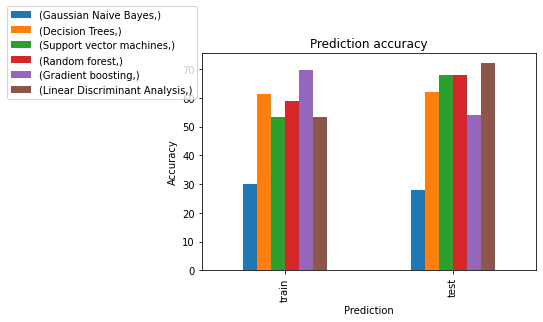

In [44]:
plt.figure(figsize=(15, 10))
ax = model_accuracy.plot(kind="bar")
ax.set_title("Prediction accuracy")
ax.set_xlabel("Prediction")
ax.set_ylabel("Accuracy")
#ax.set_xticklabels(label)
plt.legend(bbox_to_anchor=(0, 1), loc='right', ncol=1)

In [45]:
filename = "models/model-lin.b"

In [46]:
pickle.dump((sc, LDR), open(filename,'wb'))

In [47]:
dv, LDR = pickle.load(open("models/model-lin.b",'rb'))

#Cylinders 	horsepower 	weight 	acceleration
k = [[4,58.0,1825,18.6]]

y = dv.transform(k)

LDR.predict(y)

/home/deen/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([30])